In [ ]:
import pandas as pd
import numpy as np
import cv2

FER_DIR    = "data/fer2013/fer2013.csv"
IMAGE_SIZE = (48,48)
data = pd.read_csv(FER_DIR)
pixels = data['pixels'].tolist()
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'), IMAGE_SIZE)
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

happy_ind   = data['emotion'] == 3
sad_ind     = data['emotion'] == 4
neutral_ind = data['emotion'] == 6

dataset_ind = happy_ind + sad_ind + neutral_ind

emotions = pd.get_dummies((data['emotion'][dataset_ind]).as_matrix())
faces = faces[dataset_ind]


In [3]:
v2 = True

faces = faces.astype('float32')
faces = faces / 255.0

if v2:
    faces = faces - 0.5
    faces = faces * 2.0

In [7]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from model import mini_XCEPTION
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"
# parameters
batch_size = 32
num_epochs = 10000
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 3
patience = 50
base_path = 'models/'

# data generator
data_generator = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=.1,  horizontal_flip=True)

# model parameters/compilation
model = mini_XCEPTION(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

log_file_path = base_path + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/4), verbose=1)

trained_models_path = base_path + '_mini_XCEPTION'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1, save_best_only=True)

callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]
num_samples, num_classes = emotions.shape
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)
model.fit_generator(data_generator.flow(xtrain, ytrain, batch_size), steps_per_epoch=len(xtrain) / batch_size, epochs=num_epochs, verbose=1, callbacks=callbacks, validation_data=(xtest, ytest))


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 46, 46, 8)    72          input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 46, 46, 8)    32          conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 46, 46, 8)    0           batch_normalization_29[0][0]     
____________________________________________________________________________________________

In [3]:
from matplotlib import pyplot as plt

## HAPPY

/home/ozan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


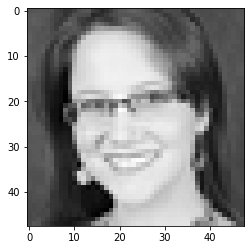

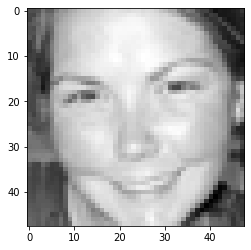

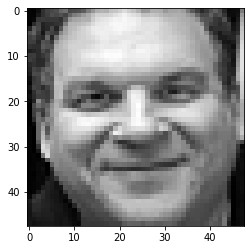

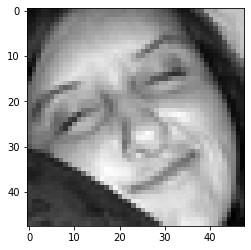

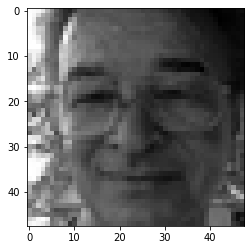

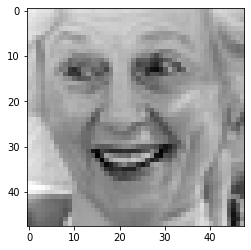

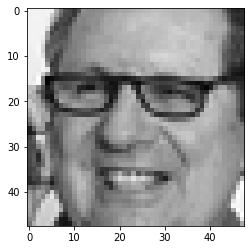

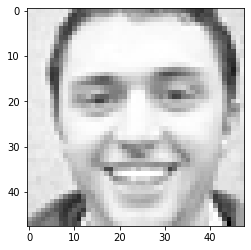

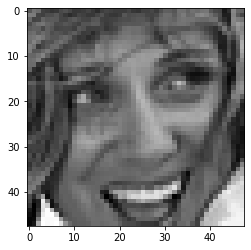

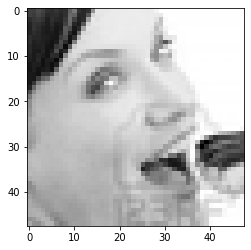

In [37]:
emo = emotions.as_matrix()
for ind in range(10):
    image = faces[ind,:,:,0]
    plt.imshow(image, cmap = 'gray')
    plt.show()

## SAD

/home/ozan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(array([0]),)


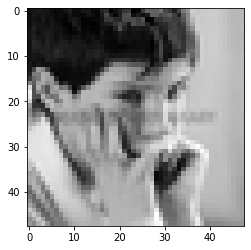

(array([0]),)


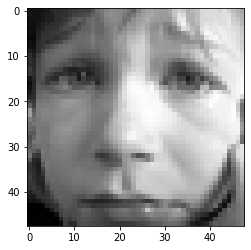

(array([0]),)


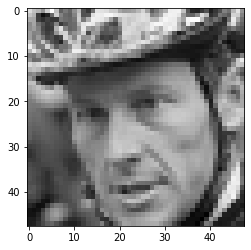

(array([0]),)


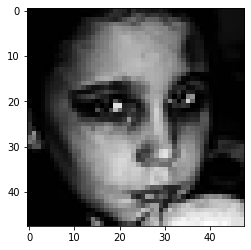

(array([0]),)


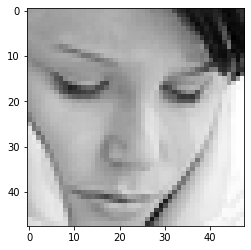

(array([0]),)


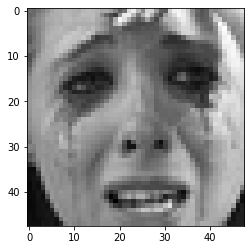

(array([0]),)


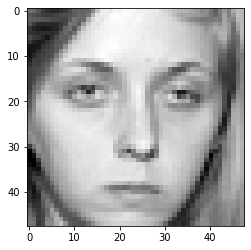

(array([0]),)


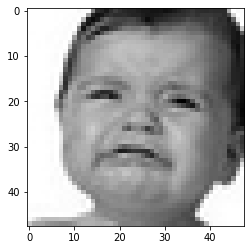

(array([0]),)


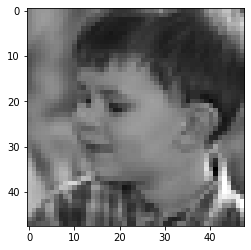

(array([0]),)


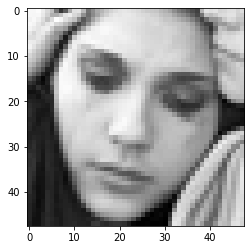

In [39]:
emo = emotions.as_matrix()
for ind in range(10):
    image = faces[ind,:,:,0]
    print(np.where(emo[ind] == 1))

    plt.imshow(image, cmap = 'gray')
    plt.show()

## NEUTRAL

/home/ozan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(array([0]),)


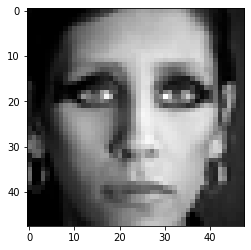

(array([0]),)


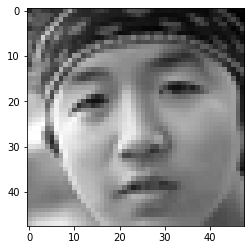

(array([0]),)


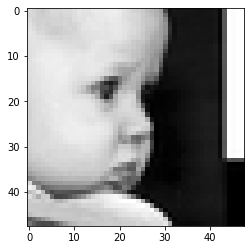

(array([0]),)


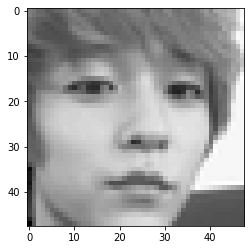

(array([0]),)


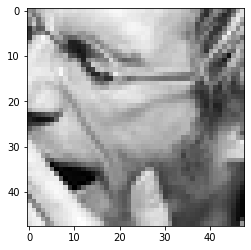

(array([0]),)


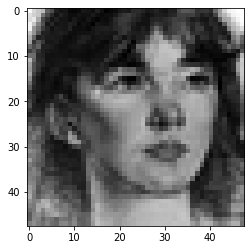

(array([0]),)


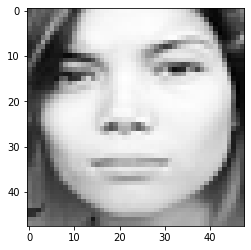

(array([0]),)


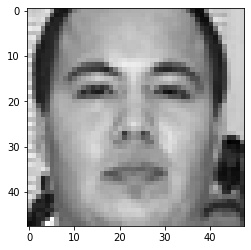

(array([0]),)


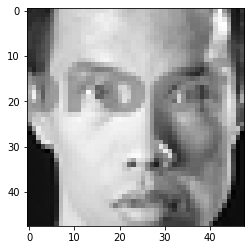

(array([0]),)


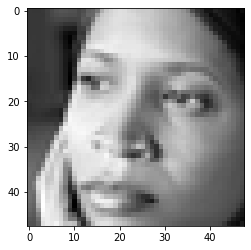

In [41]:
emo = emotions.as_matrix()
for ind in range(10):
    image = faces[ind,:,:,0]
    print(np.where(emo[ind] == 1))

    plt.imshow(image, cmap = 'gray')
    plt.show()